# EDA: nq_open_gold

The goal here is to explore the gold standard dataset from the [Power of Noise](https://github.com/florin-git/The-Power-of-Noise)  \
The description is available [here](https://huggingface.co/datasets/florin-hf/nq_open_gold)  \
What will be the exploration:
- What are the column and size of the dataset?
- How to relate the gold document with the WikiDump2018?

In [1]:
import polars as pl
from datasets import load_from_disk, load_dataset
import seaborn as sns

colors = {
    "train": "lightblue",
    "dev": "green",
    "test": "red",
}


/home/caio.rhoden/miniconda3/envs/nq/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Datasets

In [ ]:
PATH_GOLD = "../data/nq_open_gold"
test =load_dataset("json", data_files=f"{PATH_GOLD}/test_dataset.json")["train"].to_polars()
train = load_dataset("json", data_files=f"{PATH_GOLD}/train_dataset.json")["train"].to_polars()
dev = load_dataset("json", data_files=f"{PATH_GOLD}/dev_dataset.json")["train"].to_polars()

In [17]:
train.head()

example_id,question,answers,text,idx_gold_in_corpus
i64,str,list[str],str,i64
-6802534628745605728,"""total number of death row inma…","[""2,718""]","""As of June 14 , 2018 , there w…",20970735
-8178292525996414464,"""big little lies season 2 how m…","[""seven""]","""Despite originally being bille…",20970736
1727798345024846317,"""who sang waiting for a girl li…","[""Foreigner""]","""'' Waiting for a Girl Like You…",20970737
-1862942322519208465,"""where do you cross the arctic …","[""Saltfjellet""]","""The Arctic circle crosses main…",20970738
-6742567993987506913,"""who is the main character in g…","[""Sam - I - am""]","""A character named '' Sam - I -…",20970739


In [2]:
PATH_WIKI = "../data/wiki_dump2018_nq_open"
wiki = load_dataset("parquet", data_dir=f"{PATH_WIKI}/data")
dump = wiki["train"].to_polars()

Generating train split: 21035236 examples [03:38, 96487.41 examples/s] 


In [3]:
dump[20970820]

text,title
str,str
"""XLIV Date : Feb 7 , 2010 Locat…","""List of Super Bowl halftime sh…"


In [8]:
dump = wiki["train"].to_polars()

In [19]:
dump.head()

id,text,title
i64,str,str
1,"""Aaron Aaron ( or ; ""Ahärôn"") i…","""Aaron"""
2,"""God at Sinai granted Aaron the…","""Aaron"""
3,"""his rod turn into a snake. The…","""Aaron"""
4,"""however, Aaron and Hur remaine…","""Aaron"""
5,"""Aaron and his sons to the prie…","""Aaron"""


## What are the sizes of the datasets?

In [10]:
len(train)

72209

In [11]:
len(dev)

8006

In [12]:
len(test)

2889

## What are the number of questions in average by Wikipedia page?

<Axes: ylabel='Count'>

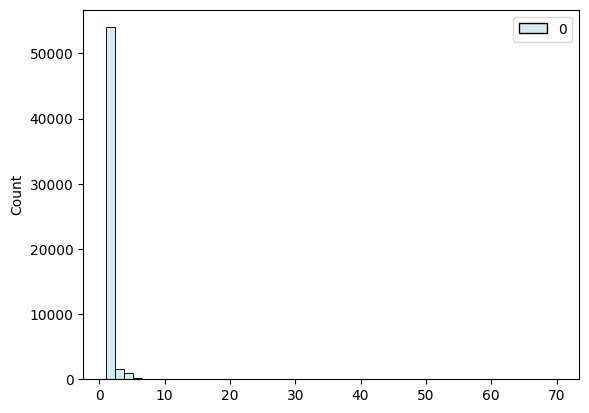

In [ ]:
_temp = (
    train
    .group_by("idx_gold_in_corpus")
    .agg(pl.col("example_id").count().alias("count"))
    .sort("count", descending=True)
)

sns.histplot(_temp.select("count"), bins=50, palette=[colors["train"]])

<Axes: ylabel='Count'>

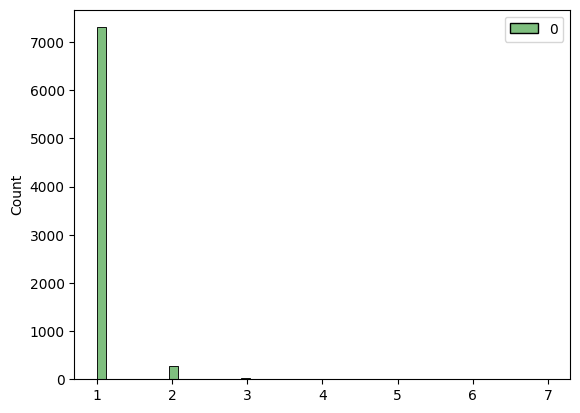

In [ ]:
_temp = (
    dev
    .group_by("idx_gold_in_corpus")
    .agg(pl.col("example_id").count().alias("count"))
    .sort("count", descending=True)
)

sns.histplot(_temp.select("count"), bins=50, palette=[colors["dev"]])

<Axes: ylabel='Count'>

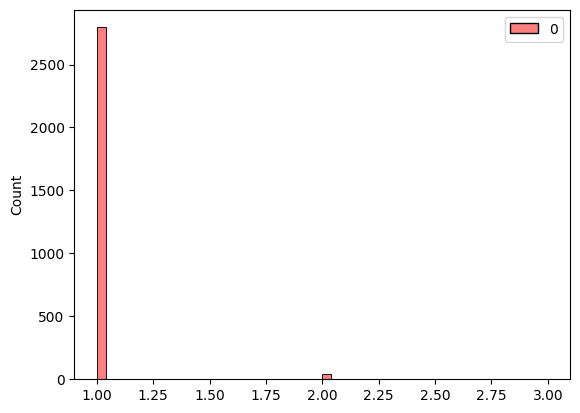

In [ ]:
_temp = (
    test
    .group_by("idx_gold_in_corpus")
    .agg(pl.col("example_id").count().alias("count"))
    .sort("count", descending=True)
)

sns.histplot(_temp.select("count"), bins=50, palette=[colors["test"]])

## Saving processed dataframes

In [ ]:
PROCESSED_GOLD_PATH = "../data/nq_open_gold/processed"
WIKI_PROCESSED_PATH = "../data/wiki_dump2018_nq_open/processed"
test.write_ipc(f"{PROCESSED_GOLD_PATH}/test.feather")
train.write_ipc(f"{PROCESSED_GOLD_PATH}/train.feather")
dev.write_ipc(f"{PROCESSED_GOLD_PATH}/dev.feather")
dump.write_ipc(f"{WIKI_PROCESSED_PATH}/wiki.feather")

## 